## Metin Ön İşleme

In [16]:
import pandas as pd

In [17]:
metin="""
A Scandal in Bohemia! 01
The Red-headed League,2
A Case, of Identity 33
The Boscombe Valley Mystery4
The Five Orange Pisp1
The man with? the Twisted Lip
The Adventure of the Blue Carbuncle
The Adventure of the Speckled Band
The Adventure of the Engineer's Thumb
The Adventure of the Noble Bachelor
The Adventure of the Beryl Coronet
The Adventure of the Copper Beeches"""
# Kirli metin.
# Yukarıdaki ifadelerin hepsi birbirinden bağımsızdır. Bu yüzden bunları ayrı ayrı ve temiz bir şekilde bölmemiz gerekir.
metin
#metin=metin.lower()

"\nA Scandal in Bohemia! 01\nThe Red-headed League,2\nA Case, of Identity 33\nThe Boscombe Valley Mystery4\nThe Five Orange Pisp1\nThe man with? the Twisted Lip\nThe Adventure of the Blue Carbuncle\nThe Adventure of the Speckled Band\nThe Adventure of the Engineer's Thumb\nThe Adventure of the Noble Bachelor\nThe Adventure of the Beryl Coronet\nThe Adventure of the Copper Beeches"

In [18]:
metin.split("\n") # \n'e göre böldük fakat halen bazı kirlilikler mevcut.

['',
 'A Scandal in Bohemia! 01',
 'The Red-headed League,2',
 'A Case, of Identity 33',
 'The Boscombe Valley Mystery4',
 'The Five Orange Pisp1',
 'The man with? the Twisted Lip',
 'The Adventure of the Blue Carbuncle',
 'The Adventure of the Speckled Band',
 "The Adventure of the Engineer's Thumb",
 'The Adventure of the Noble Bachelor',
 'The Adventure of the Beryl Coronet',
 'The Adventure of the Copper Beeches']

In [19]:
v_metin=metin.split("\n")
v=pd.Series(v_metin) # metnimizi vektöre yani pandas Series'e çevirelim.
v # vektöre(seriye) çevirdik

0                                          
1                  A Scandal in Bohemia! 01
2                   The Red-headed League,2
3                    A Case, of Identity 33
4              The Boscombe Valley Mystery4
5                     The Five Orange Pisp1
6             The man with? the Twisted Lip
7       The Adventure of the Blue Carbuncle
8        The Adventure of the Speckled Band
9     The Adventure of the Engineer's Thumb
10      The Adventure of the Noble Bachelor
11       The Adventure of the Beryl Coronet
12      The Adventure of the Copper Beeches
dtype: object

In [20]:
metin_vektoru=v[1:] # boş elemandan da bu şekilde kurtulduk.
metin_vektoru

1                  A Scandal in Bohemia! 01
2                   The Red-headed League,2
3                    A Case, of Identity 33
4              The Boscombe Valley Mystery4
5                     The Five Orange Pisp1
6             The man with? the Twisted Lip
7       The Adventure of the Blue Carbuncle
8        The Adventure of the Speckled Band
9     The Adventure of the Engineer's Thumb
10      The Adventure of the Noble Bachelor
11       The Adventure of the Beryl Coronet
12      The Adventure of the Copper Beeches
dtype: object

In [21]:
metin_vektoru.reset_index(inplace=True,drop=True) # indexleri yeniden dizdik.
metin_vektoru

0                  A Scandal in Bohemia! 01
1                   The Red-headed League,2
2                    A Case, of Identity 33
3              The Boscombe Valley Mystery4
4                     The Five Orange Pisp1
5             The man with? the Twisted Lip
6       The Adventure of the Blue Carbuncle
7        The Adventure of the Speckled Band
8     The Adventure of the Engineer's Thumb
9       The Adventure of the Noble Bachelor
10       The Adventure of the Beryl Coronet
11      The Adventure of the Copper Beeches
dtype: object

In [22]:
metin_df=pd.DataFrame(metin_vektoru,columns=["Hikayeler"]) # metni df ye çevirdik.
# Metni df ye çevirmemizin amacı aşağıdaki fonksiyonları pandas ile df üzerinden uygulayabileceğimizden dolayıdır.
metin_df

,Hikayeler
0,A Scandal in Bohemia! 01
1,"The Red-headed League,2"
2,"A Case, of Identity 33"
3,The Boscombe Valley Mystery4
4,The Five Orange Pisp1
5,The man with? the Twisted Lip
6,The Adventure of the Blue Carbuncle
7,The Adventure of the Speckled Band
8,The Adventure of the Engineer's Thumb
9,The Adventure of the Noble Bachelor


#### Büyük-Küçük Harf Dönüşümleri

In [23]:
# Metinde sorunlarla karşılaşmadan rahat rahat işlemler yapabilmek için tüm değerlerimizi aynı boyutta tutarız.
# Bu yüzden büyük ya da küçük harflere çevirip işlemlere devam ederiz.
kopya_mdf=metin_df.copy() # metni korumak ve üzerinde rahat değişiklik yapmak amacıyla kopyalıyoruz.

In [24]:
kopya_mdf

,Hikayeler
0,A Scandal in Bohemia! 01
1,"The Red-headed League,2"
2,"A Case, of Identity 33"
3,The Boscombe Valley Mystery4
4,The Five Orange Pisp1
5,The man with? the Twisted Lip
6,The Adventure of the Blue Carbuncle
7,The Adventure of the Speckled Band
8,The Adventure of the Engineer's Thumb
9,The Adventure of the Noble Bachelor


##### apply() 
- apply() fonksiyonu içerisinde lambda kullanarak var olan değişkenin içerisinde değişiklik yapabilir ya da DataFrame objesi içerisinde yer alan değişkenlerden yeni değişkenler türetilebilir.

In [25]:
kopya_mdf=kopya_mdf["Hikayeler"].apply(lambda x: " ".join(x.lower() for x in x.split())) 
# x lambda'daki geçici değişkenimizdir.
# Burada yaptığımız işlem df tipinde olan bir metin topluluğumuzun kolonunu önce alıyoruz.
# daha sonra apply fonksiyonu ve lambda kullanarak hikayeler kolonunda bulduğumuz metinleri bir de for döngüsü açarak
# kendi içlerinde hepsi bağımsız karaktermiş gibi üzerlerinde geziyor, hepsini küçültüyor daha sonra gereksiz boşlukları
# split() ile temizliyoruz.
kopya_mdf

0                  a scandal in bohemia! 01
1                   the red-headed league,2
2                    a case, of identity 33
3              the boscombe valley mystery4
4                     the five orange pisp1
5             the man with? the twisted lip
6       the adventure of the blue carbuncle
7        the adventure of the speckled band
8     the adventure of the engineer's thumb
9       the adventure of the noble bachelor
10       the adventure of the beryl coronet
11      the adventure of the copper beeches
Name: Hikayeler, dtype: object

In [26]:
#kopya_mdf["Hikayeler"].apply(lambda x: " ".join(x.lower())) 
# Yukarıdaki çıktının split()'siz hali böyle bozuk gözükmektedir.

#### Noktalama İşaretlerinin Silinmesi

- Metin analitiği yaparken amacımız yukarıdaki gibi metin, kelime topluluklarına nümerik, analitik işlem uygulama olduğunda bu kelime topluluklarını nümerik ve ölçülebilir değerlere dönüştürmemiz gerekmektedir. Bunada metnin içerisinde geçen kelimelerin frekanslarını almak demektir. Bu durunmda metin içerisinde yer alan bütün saf kelime, tekil kelime, köküne indirgenmmiş kelime dışındaki; büyük-küçük harf, noktalama işaretleri, boşluk durumu gibi etkenleri ortadan kaldırmalıyız.
- Amaç kelimeleri yalın halde bırakıp, frekanslarını sayılabilir hale getirmektir. Bu sayede kitaplar arası kelime kıyası gibi değişik amaçlar için kelimelerden yararlanabiliriz.

In [27]:
kopya_mdf

0                  a scandal in bohemia! 01
1                   the red-headed league,2
2                    a case, of identity 33
3              the boscombe valley mystery4
4                     the five orange pisp1
5             the man with? the twisted lip
6       the adventure of the blue carbuncle
7        the adventure of the speckled band
8     the adventure of the engineer's thumb
9       the adventure of the noble bachelor
10       the adventure of the beryl coronet
11      the adventure of the copper beeches
Name: Hikayeler, dtype: object

In [28]:
kopya_mdf=kopya_mdf.str.replace("[^\w\s]","") 
# "[^\w\s]" ifadesi noktalama işaretleri demektir. Noktalama işaretleri yerine bir şey yazma demiş olduk.
kopya_mdf

0                  a scandal in bohemia 01
1                    the redheaded league2
2                    a case of identity 33
3             the boscombe valley mystery4
4                    the five orange pisp1
5             the man with the twisted lip
6      the adventure of the blue carbuncle
7       the adventure of the speckled band
8     the adventure of the engineers thumb
9      the adventure of the noble bachelor
10      the adventure of the beryl coronet
11     the adventure of the copper beeches
Name: Hikayeler, dtype: object

#### Sayıların Silinmesi

In [29]:
# Metni daha da yalın hale getirmek için eğer luzümsuz ise sayıları bu şekilde siliyoruz.
kopya_mdf=kopya_mdf.str.replace("\d","") 
kopya_mdf

0                    a scandal in bohemia 
1                     the redheaded league
2                      a case of identity 
3              the boscombe valley mystery
4                     the five orange pisp
5             the man with the twisted lip
6      the adventure of the blue carbuncle
7       the adventure of the speckled band
8     the adventure of the engineers thumb
9      the adventure of the noble bachelor
10      the adventure of the beryl coronet
11     the adventure of the copper beeches
Name: Hikayeler, dtype: object

#### Stopwords Silinmesi
- Tek başına anlamı olmayan kelimeler:the,a,with gibi kelimelerin silinmesi

In [30]:
kopya_mdf=pd.DataFrame(kopya_mdf,columns=["Hikayeler"])
kopya_mdf

,Hikayeler
0,a scandal in bohemia
1,the redheaded league
2,a case of identity
3,the boscombe valley mystery
4,the five orange pisp
5,the man with the twisted lip
6,the adventure of the blue carbuncle
7,the adventure of the speckled band
8,the adventure of the engineers thumb
9,the adventure of the noble bachelor


In [31]:
import nltk

In [32]:
dir(nltk) # nltk içerisindeki modüller

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGrap

In [33]:
nltk.download("stopwords") # Stopwords indirdildi.

[nltk_data] Downloading package stopwords to C:\Users\Fucking
[nltk_data]     Education\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
from nltk.corpus import stopwords
# Stopwords işlemleri için kütüphane çağırıyoruz.

In [35]:
sw=stopwords.words("english") # ingilizcedeki stopwordsleri aldık.
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
kopya_mdf

,Hikayeler
0,a scandal in bohemia
1,the redheaded league
2,a case of identity
3,the boscombe valley mystery
4,the five orange pisp
5,the man with the twisted lip
6,the adventure of the blue carbuncle
7,the adventure of the speckled band
8,the adventure of the engineers thumb
9,the adventure of the noble bachelor


In [37]:
kopya_mdf=kopya_mdf["Hikayeler"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
kopya_mdf

0               scandal bohemia
1              redheaded league
2                 case identity
3       boscombe valley mystery
4              five orange pisp
5               man twisted lip
6      adventure blue carbuncle
7       adventure speckled band
8     adventure engineers thumb
9      adventure noble bachelor
10      adventure beryl coronet
11     adventure copper beeches
Name: Hikayeler, dtype: object

Yukarıdaki işlemin özeti olarak:
-  join(x for x in x.split() if x not in sw) ifadesi ile tıpkı bir öncekindeki gibi "Hikayeler" kolonundaki değişkenlerde geziyoruz. Bu değerlerin yine gereksiz boşluklarını alıyoruz fakat farklı olarak bu üzerinde gezdiğimiz değerler eğer sw listesindeki kelimelerden biri değilse(<b>if x not in sw</b>) o aynı olmayan kelimeyi(<b>x</b> for x in) " " ifadesi ile birleştiriyoruz. Eğer sw listesindeki bir değer ile bizim üzerinde olduğumuz değer aynı ise bu değeri almıyoruz. Bu sayede gereksiz ve tek başına anlamsız bağlaçlardan kurturluyoruz.

#### Az Geçen Kelimelerin Silinmesi

In [38]:
kopya_mdf=pd.DataFrame(kopya_mdf,columns=["Hikayeler"]) 
# df ye çevirmemizin nedeni aşağıdaki value_counts() bir df fonksiyonudur.

In [39]:
from nltk.probability import FreqDist
from nltk import sent_tokenize
from nltk import word_tokenize

In [40]:
kopya_mdf["Hikayeler"]

0               scandal bohemia
1              redheaded league
2                 case identity
3       boscombe valley mystery
4              five orange pisp
5               man twisted lip
6      adventure blue carbuncle
7       adventure speckled band
8     adventure engineers thumb
9      adventure noble bachelor
10      adventure beryl coronet
11     adventure copper beeches
Name: Hikayeler, dtype: object

In [41]:
pd.Series(" ".join(kopya_mdf["Hikayeler"]).split()).value_counts()
# Bu şekilde kelime sıklıklarını görüyoruz.

adventure    6
bachelor     1
boscombe     1
engineers    1
redheaded    1
valley       1
coronet      1
pisp         1
blue         1
lip          1
man          1
scandal      1
twisted      1
beryl        1
mystery      1
speckled     1
orange       1
noble        1
copper       1
band         1
beeches      1
identity     1
bohemia      1
league       1
five         1
case         1
thumb        1
carbuncle    1
dtype: int64

In [42]:
### sondaki en az geçen 3 tane değeri silelim
silinecekler=pd.Series(" ".join(kopya_mdf["Hikayeler"]).split()).value_counts()[-3:]
silinecekler

case         1
thumb        1
carbuncle    1
dtype: int64

In [43]:
kopya_mdf["Hikayeler"].apply(lambda x: " ".join(i for i in x.split() if i not in silinecekler))
### sondaki en geçen 3 tane değeri silelim

0              scandal bohemia
1             redheaded league
2                     identity
3      boscombe valley mystery
4             five orange pisp
5              man twisted lip
6               adventure blue
7      adventure speckled band
8          adventure engineers
9     adventure noble bachelor
10     adventure beryl coronet
11    adventure copper beeches
Name: Hikayeler, dtype: object

#### Tokenization
- Cümleyi kelimelere ayırıp yeni bir vektör,liste oluşturma işlemi olarak düşünülebilir.
- textblob kütüphanesinin TextBlob modülünü kullanarak kelimeleri ayıklıyoruz.

In [44]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\Fucking
[nltk_data]     Education\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
!pip install textblob

In [46]:
import textblob

In [47]:
from textblob import TextBlob

In [48]:
TextBlob(kopya_mdf["Hikayeler"][1]).words
# words ile kelimeleri bir kelime listesi şeklinde ayıklıyoruz.

WordList(['redheaded', 'league'])

In [49]:
kopya_mdf["Hikayeler"][1]

'redheaded league'

In [50]:
kopya_mdf["Hikayeler"].apply(lambda x: TextBlob(x).words)

0                [scandal, bohemia]
1               [redheaded, league]
2                  [case, identity]
3       [boscombe, valley, mystery]
4              [five, orange, pisp]
5               [man, twisted, lip]
6      [adventure, blue, carbuncle]
7       [adventure, speckled, band]
8     [adventure, engineers, thumb]
9      [adventure, noble, bachelor]
10      [adventure, beryl, coronet]
11     [adventure, copper, beeches]
Name: Hikayeler, dtype: object

#### Stemming
- Bir kelimeyi köküne indirgeme işlemini yapar.(gözlük,gözler,gözlükçü gibi kelimelerin kökünün göz olduğunu bize söylemeye yarar).
- Buradaki çalışmamızda ingilizce sözcükler ile çalıştığımız için kelimelerin sonundaki (-ed,-ity gibi) takıların gitmesini beklemekteyiz.
- Çok sağlıklı sonuçlar almama ihtimalimiz küçümsenmeyecek kadar yüksektir !!!

In [51]:
from nltk.stem import PorterStemmer
st=PorterStemmer()

##### Aşağıdaki işlemin amacı :
- Önceki apply ve lambda işlemlerinden tek farkı st.steam ile belirttiğimiz ve çağırdığımız kelimeyi köküne indirgeme fonksiyonunu kullanmamızdır. Bunun kullanımı da üzerinde gezilen değerlerden (x'lerden) içerisinde ek,takı barındıran kelimelerin takılarını ve eklerini atıp köklerini almamızdır. Bunun içinde değişkenimizi fonksiyonun içerisine yazıp her seferinde join ile birleştiriyoruz. Sonuç olarakta yine Pandas.series tipinde veri yapısı döndürüyoruz.
- Buradaki <b>st.stem(i)</b> içerisindeki i ve <b>for i in x.split()</b>'in içerisindeki <b>i</b>'ler <b>döngünün </b>elemanlarıdır. <b>for i in x.split()</b> ise burada lambda fonksiyonunu değişkeni olan <b>x</b> elemanıdır. Bu eleman ile sözcükler split() edilir. Daha sonra döngülerdeki <b>i</b>'ler ile sözcüklerin üzerinde gezilir veya koşul işlemleri yaptırılır. Yani burada i yerine word,kelime,gezen gibi değişken isimleri de verebiliriz önemli olan kafa karışıklığını azaltmak ve o döngüde gezinenin ve değişkenin ne olduğunu ayırt etmektir.

In [52]:
kopya_mdf["Hikayeler"].apply(lambda x: " ".join(st.stem(i) for i in x.split()))

0            scandal bohemia
1              redhead leagu
2                 case ident
3     boscomb valley mysteri
4            five orang pisp
5              man twist lip
6     adventur blue carbuncl
7       adventur speckl band
8       adventur engin thumb
9     adventur nobl bachelor
10    adventur beryl coronet
11     adventur copper beech
Name: Hikayeler, dtype: object

#### Lemmatization
- Stemming işleminden daha sağlıklı ve daha çok tercih edilebilir durumdadır.

In [53]:
from textblob import Word
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to C:\Users\Fucking
[nltk_data]     Education\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [54]:
kopya_mdf["Hikayeler"].apply(lambda x: " ".join(Word(i).lemmatize() for i in x.split()))
# Burada i değerini Word() fonksiyonun içerisine yazıyoruz çünkü bu fonksiyon string değer almakta.

0              scandal bohemia
1             redheaded league
2                case identity
3      boscombe valley mystery
4             five orange pisp
5              man twisted lip
6     adventure blue carbuncle
7      adventure speckled band
8     adventure engineer thumb
9     adventure noble bachelor
10     adventure beryl coronet
11      adventure copper beech
Name: Hikayeler, dtype: object

In [55]:
# İLK İFADEMİZ
metin_df["Hikayeler"][0:5]

0        A Scandal in Bohemia! 01
1         The Red-headed League,2
2          A Case, of Identity 33
3    The Boscombe Valley Mystery4
4           The Five Orange Pisp1
Name: Hikayeler, dtype: object

In [56]:
# METİN ÖN İŞLEME İŞLEMLERİNDEN SONRAKİ İFADEMİZ.
kopya_mdf["Hikayeler"][0:5]

0            scandal bohemia
1           redheaded league
2              case identity
3    boscombe valley mystery
4           five orange pisp
Name: Hikayeler, dtype: object

## NLP Uygulamaları

#### N-Gram
- N-gram'lar birlikte kullanılan kelimelerin kombinasyonlarını gösterir.

In [57]:
a="""Bu örneği anlaşılabilmesi için daha uzun bir metin üzerinde göstereceğim. N-gram'lar birlikte kullanılan kelimelerin
kombinasyonlarını gösterir."""

In [58]:
TextBlob(a).ngrams(1) # 1 dersek kelimeler teker teker wordlist'lere böler.

[WordList(['Bu']),
 WordList(['örneği']),
 WordList(['anlaşılabilmesi']),
 WordList(['için']),
 WordList(['daha']),
 WordList(['uzun']),
 WordList(['bir']),
 WordList(['metin']),
 WordList(['üzerinde']),
 WordList(['göstereceğim']),
 WordList(["N-gram'lar"]),
 WordList(['birlikte']),
 WordList(['kullanılan']),
 WordList(['kelimelerin']),
 WordList(['kombinasyonlarını']),
 WordList(['gösterir'])]

In [59]:
TextBlob(a).ngrams(2) # 2 ve 2'den fazla dersek birbirine bağlı şekilde bir önce kelimeyi de dahil ederek ilerler

[WordList(['Bu', 'örneği']),
 WordList(['örneği', 'anlaşılabilmesi']),
 WordList(['anlaşılabilmesi', 'için']),
 WordList(['için', 'daha']),
 WordList(['daha', 'uzun']),
 WordList(['uzun', 'bir']),
 WordList(['bir', 'metin']),
 WordList(['metin', 'üzerinde']),
 WordList(['üzerinde', 'göstereceğim']),
 WordList(['göstereceğim', "N-gram'lar"]),
 WordList(["N-gram'lar", 'birlikte']),
 WordList(['birlikte', 'kullanılan']),
 WordList(['kullanılan', 'kelimelerin']),
 WordList(['kelimelerin', 'kombinasyonlarını']),
 WordList(['kombinasyonlarını', 'gösterir'])]

In [60]:
TextBlob(a).ngrams(3)

[WordList(['Bu', 'örneği', 'anlaşılabilmesi']),
 WordList(['örneği', 'anlaşılabilmesi', 'için']),
 WordList(['anlaşılabilmesi', 'için', 'daha']),
 WordList(['için', 'daha', 'uzun']),
 WordList(['daha', 'uzun', 'bir']),
 WordList(['uzun', 'bir', 'metin']),
 WordList(['bir', 'metin', 'üzerinde']),
 WordList(['metin', 'üzerinde', 'göstereceğim']),
 WordList(['üzerinde', 'göstereceğim', "N-gram'lar"]),
 WordList(['göstereceğim', "N-gram'lar", 'birlikte']),
 WordList(["N-gram'lar", 'birlikte', 'kullanılan']),
 WordList(['birlikte', 'kullanılan', 'kelimelerin']),
 WordList(['kullanılan', 'kelimelerin', 'kombinasyonlarını']),
 WordList(['kelimelerin', 'kombinasyonlarını', 'gösterir'])]

#### Part of speech tagging (POS)
- Metinde bulunan kelimelerin öge(sıfat,isim,zarf gibi) durumlarını tespit eder.
- Kısaltmaların anlamı için "https://pythonprogramming.net/part-of-speech-tagging-nltk-tutorial/" adresine bakılabilir.

In [61]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Fucking
[nltk_data]     Education\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [62]:
TextBlob(kopya_mdf["Hikayeler"][2]).tags
# tags ile seçtiğimiz kelimelerin hangi öge olduğunu bulundu.

[('case', 'NN'), ('identity', 'NN')]

In [63]:
kopya_mdf["Hikayeler"][2]

'case identity'

In [64]:
kopya_mdf["Hikayeler"].apply(lambda x:TextBlob(x).tags) 
# Tüm kelimeler için ise yine apply ve lambda yardımı ile kelimleri geziyoruz.

0                        [(scandal, NN), (bohemia, NN)]
1                      [(redheaded, VBN), (league, NN)]
2                          [(case, NN), (identity, NN)]
3         [(boscombe, NN), (valley, NN), (mystery, NN)]
4                [(five, CD), (orange, NN), (pisp, NN)]
5                [(man, NN), (twisted, VBD), (lip, NN)]
6        [(adventure, NN), (blue, JJ), (carbuncle, NN)]
7        [(adventure, NN), (speckled, VBD), (band, NN)]
8     [(adventure, NN), (engineers, NNS), (thumb, VBP)]
9        [(adventure, NN), (noble, JJ), (bachelor, NN)]
10        [(adventure, NN), (beryl, NN), (coronet, NN)]
11      [(adventure, NN), (copper, NN), (beeches, NNS)]
Name: Hikayeler, dtype: object

#### Chunking (shallow parsing)- Parçalama/Ayrıştırma
- Yukarıda çıkardığımız öge durumlarını diyagram ile de gösterebilmemizi sağlar.

In [65]:
pos=kopya_mdf["Hikayeler"].apply(lambda x:TextBlob(x).tags)

In [66]:
pos

0                        [(scandal, NN), (bohemia, NN)]
1                      [(redheaded, VBN), (league, NN)]
2                          [(case, NN), (identity, NN)]
3         [(boscombe, NN), (valley, NN), (mystery, NN)]
4                [(five, CD), (orange, NN), (pisp, NN)]
5                [(man, NN), (twisted, VBD), (lip, NN)]
6        [(adventure, NN), (blue, JJ), (carbuncle, NN)]
7        [(adventure, NN), (speckled, VBD), (band, NN)]
8     [(adventure, NN), (engineers, NNS), (thumb, VBP)]
9        [(adventure, NN), (noble, JJ), (bachelor, NN)]
10        [(adventure, NN), (beryl, NN), (coronet, NN)]
11      [(adventure, NN), (copper, NN), (beeches, NNS)]
Name: Hikayeler, dtype: object

In [67]:
cumle="""Jake arrives at Euston station in London. It is a holiday
weekend and it is his first time away from Manchester.
Jake is eighteen years old and he lives with his family.
"""

In [68]:
pos=TextBlob(cumle).tags

In [69]:
pos

[('Jake', 'NNP'),
 ('arrives', 'VBZ'),
 ('at', 'IN'),
 ('Euston', 'NNP'),
 ('station', 'NN'),
 ('in', 'IN'),
 ('London', 'NNP'),
 ('It', 'PRP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('holiday', 'JJ'),
 ('weekend', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('his', 'PRP$'),
 ('first', 'JJ'),
 ('time', 'NN'),
 ('away', 'RB'),
 ('from', 'IN'),
 ('Manchester', 'NNP'),
 ('Jake', 'NNP'),
 ('is', 'VBZ'),
 ('eighteen', 'JJ'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 ('and', 'CC'),
 ('he', 'PRP'),
 ('lives', 'VBZ'),
 ('with', 'IN'),
 ('his', 'PRP$'),
 ('family', 'NN')]

In [70]:
rp=nltk.RegexpParser("NP:{<DT>?<JJ>*<NN>}")
# nltk.RegexpParser biİr ayrıştırıcıdır. İçerisine ise ögelerin ayrışacağı formatı yazarak ayrıştırmayı yapıyoruz.


In [71]:
sonuclar=rp.parse(pos)

In [72]:
sonuclar.draw()

#### Named Entity Recognition
- Metinlerin içerisindeki kelimelerin ögelerini yukarıdaki Chunking ve POS ' da yapmıştık. Burada ise bu ayrılan ögelerin mesele ögesi nesne olan bir kelimenin ne olduğunu yani; bir apartman mı ? bir sandalye mi ? ya da ögesi isim olan bir kelimenin; kişi ismi mi ? okul ismi mi ? gibi hangisi olduğunu bize söyler.

In [73]:
from nltk import word_tokenize, pos_tag, ne_chunk
# nltk içerisindeki fonksiyonları dahil ediyoruz.
nltk.download("maxent_ne_chunker")
nltk.download("words")

[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Fucking
[nltk_data]     Education\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Fucking
[nltk_data]     Education\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [74]:
cumle2="""It is the evening of 21 June 1982 the first day of
summer. Newspaper and television reporters near the
doors of St Marys Hospital in Paddington, London,
talk quickly into their telephones"""
print(ne_chunk(pos_tag(word_tokenize(cumle2))))
# Görüldüğü üzere aşağıda London ve Paddingtonu yerleşke ismi olarak yakaladı.

(S
  It/PRP
  is/VBZ
  the/DT
  evening/NN
  of/IN
  21/CD
  June/NNP
  1982/CD
  the/DT
  first/JJ
  day/NN
  of/IN
  summer/NN
  ./.
  Newspaper/NNP
  and/CC
  television/NN
  reporters/NNS
  near/IN
  the/DT
  doors/NNS
  of/IN
  St/NNP
  (PERSON Marys/NNP Hospital/NNP)
  in/IN
  (GPE Paddington/NNP)
  ,/,
  (GPE London/NNP)
  ,/,
  talk/NN
  quickly/RB
  into/IN
  their/PRP$
  telephones/NNS)


## Matematiksel İşlemler ve Basit Özellik Çıkarımı

#### Harf/Karakter Sayısı Çıkarımı

In [75]:
metin_df["Hikayeler"].str.len() # ham metin
# Satırlardaki her bir stringi sayar.(boşluklarda dahildir) 

0     24
1     23
2     22
3     28
4     21
5     29
6     35
7     34
8     37
9     35
10    34
11    35
Name: Hikayeler, dtype: int64

In [76]:
clean_mdf=kopya_mdf.copy()

In [77]:
clean_mdf["Hikayeler"].str.len()

0     15
1     16
2     13
3     23
4     16
5     15
6     24
7     23
8     25
9     24
10    23
11    24
Name: Hikayeler, dtype: int64

In [78]:
clean_mdf["Hikayeler"]

0               scandal bohemia
1              redheaded league
2                 case identity
3       boscombe valley mystery
4              five orange pisp
5               man twisted lip
6      adventure blue carbuncle
7       adventure speckled band
8     adventure engineers thumb
9      adventure noble bachelor
10      adventure beryl coronet
11     adventure copper beeches
Name: Hikayeler, dtype: object

In [79]:
kopya_mdf["karakter_sayisi"]=kopya_mdf["Hikayeler"].str.len()
# "karakter_sayisi", her satırdaki ifadelerin nümerik değeri olarak düşünülmelidir.

In [80]:
kopya_mdf

,Hikayeler,karakter_sayisi
0,scandal bohemia,15
1,redheaded league,16
2,case identity,13
3,boscombe valley mystery,23
4,five orange pisp,16
5,man twisted lip,15
6,adventure blue carbuncle,24
7,adventure speckled band,23
8,adventure engineers thumb,25
9,adventure noble bachelor,24


#### Kelime Sayısı Çıkarımı

In [81]:
a="scandal bohemia"

In [82]:
a.split()

['scandal', 'bohemia']

In [83]:
type(len(a.split()))

int

In [84]:
kopya_mdf["kelime_sayilari"]=kopya_mdf["Hikayeler"].apply(lambda x: len(str(x).split(" ")))
# Satırlardaki kelime sayıları.

In [85]:
kopya_mdf

,Hikayeler,karakter_sayisi,kelime_sayilari
0,scandal bohemia,15,2
1,redheaded league,16,2
2,case identity,13,2
3,boscombe valley mystery,23,3
4,five orange pisp,16,3
5,man twisted lip,15,3
6,adventure blue carbuncle,24,3
7,adventure speckled band,23,3
8,adventure engineers thumb,25,3
9,adventure noble bachelor,24,3


#### Özel Karakterleri Yakalama
- Özellikle belirgin bir karakter arıyorsak; Twitterda "#" ve "@" işaretleri gibi durumlarda çok işimize yarar.

In [71]:
kopya_mdf["Hikayeler"].apply(lambda x: len([i for i in x.split() if i.startswith("adventure")]))
# Buradaki döngüde öncekilerden farklı olarak len() fonksiyonu içerisinde döngü yapacağımız için bu döngünün içerisini
# liste olarak almak istediğimizi belirtmemiz gerekmekte aksi takdirde hata alabiliriz.
# i.startswith("adventure") ile hangi satırdaki ifadeler "adventure" ile başlıyor bunu öğreniyoruz.
# startswith() içerisine alınan değeri bulursa True bulamazsa False döndürür.

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    1
11    1
Name: Hikayeler, dtype: int64

In [72]:
kopya_mdf["ozel_karakter_sayisi(adventure)"]=kopya_mdf["Hikayeler"].apply(lambda x: 
                                                                    len([i for i in x.split() if i.startswith("adventure")]))


In [73]:
kopya_mdf

,Hikayeler,karakter_sayisi,kelime_sayilari,ozel_karakter_sayisi(adventure)
0,scandal bohemia,15,2,0
1,redheaded league,16,2,0
2,case identity,13,2,0
3,boscombe valley mystery,23,3,0
4,five orange pisp,16,3,0
5,man twisted lip,15,3,0
6,adventure blue carbuncle,24,3,1
7,adventure speckled band,23,3,1
8,adventure engineers thumb,25,3,1
9,adventure noble bachelor,24,3,1


#### Sayıları Yakalamak & Saydırmak

In [74]:
# ham veri setimizde karakterlerle birlikte sayılarda vardı. Bu yüzden burada onu kullanacağız.
metin_df

,Hikayeler
0,A Scandal in Bohemia! 01
1,"The Red-headed League,2"
2,"A Case, of Identity 33"
3,The Boscombe Valley Mystery4
4,The Five Orange Pisp1
5,The man with? the Twisted Lip
6,The Adventure of the Blue Carbuncle
7,The Adventure of the Speckled Band
8,The Adventure of the Engineer's Thumb
9,The Adventure of the Noble Bachelor


In [75]:
metin_df["Hikayeler"].apply(lambda x: len([i for i in x.split() if i.isdigit()]))
# Ham metinimizdeki satırlarda sayı var mı ? kaç adet var ? sorgusu yapıyoruz.

0     1
1     0
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
Name: Hikayeler, dtype: int64

In [76]:
kopya_mdf["sayi_adeti"]=metin_df["Hikayeler"].apply(lambda x: len([i for i in x.split() if i.isdigit()]))

In [77]:
kopya_mdf

,Hikayeler,karakter_sayisi,kelime_sayilari,ozel_karakter_sayisi(adventure),sayi_adeti
0,scandal bohemia,15,2,0,1
1,redheaded league,16,2,0,0
2,case identity,13,2,0,1
3,boscombe valley mystery,23,3,0,0
4,five orange pisp,16,3,0,0
5,man twisted lip,15,3,0,0
6,adventure blue carbuncle,24,3,1,0
7,adventure speckled band,23,3,1,0
8,adventure engineers thumb,25,3,1,0
9,adventure noble bachelor,24,3,1,0


## Metin Görselleştirme
- Yukarıda öğrendiklerimizi aşağıdaki "train.tsv" veri seti üzerine uygulayıp, ham metni daha düzgün hale getirelim. Daha sonra bunu görselleştireceğiz.

In [78]:
import pandas as pd 
data=pd.read_csv("train.tsv",sep="\t")
# tsv dosya uzantısı sekmeyle ayrılmış dosya tipleridir.
# sekmeden kast ettiğimiz excellde ki blok ya da notepad'teki bir TAB tuşu gibidir.
# bu uzantıyı da csv okuyucu ile açabiliriz.
data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [80]:
# BÜYÜK-KÜÇÜK HARF DÖNÜŞÜMÜ
data["Phrase"]=data["Phrase"].apply(lambda x:" ".join(i.lower() for i in x.split()))

In [81]:
# NOKTALAMA İŞARETLERİ AYRIŞTIRMASI
data["Phrase"]=data["Phrase"].str.replace("[^\w\s]","")

In [82]:
# SAYILARI AYRIŞTIRMAK
data["Phrase"]=data["Phrase"].str.replace("\d","")

In [83]:
# STOPWORDS SİLME
data["Phrase"]=data["Phrase"].apply(lambda x :" ".join(i for i in x.split() if i not in sw))

In [84]:
# SEYREK İFADELERİ SİLME
deletes=pd.Series(" ".join(data["Phrase"]).split()).value_counts()[-1000:]
data["Phrase"]=data["Phrase"].apply(lambda x :" ".join(i for i in x.split() if i not in deletes))

In [85]:
# LEMMATIZATION
data["Phrase"]=data["Phrase"].apply(lambda x :" ".join(Word(i).lemmatize() for i in x.split()))

In [86]:
data["Phrase"].head(10)

0    series escapade demonstrating adage good goose...
1       series escapade demonstrating adage good goose
2                                               series
3                                                     
4                                               series
5              escapade demonstrating adage good goose
6                                                     
7              escapade demonstrating adage good goose
8                                             escapade
9                       demonstrating adage good goose
Name: Phrase, dtype: object

### Terim Frekansı

In [87]:
tf1= (data["Phrase"].apply(lambda x : pd.value_counts(x.split(" ")))).sum(axis=0).reset_index()
# Bütün kelimeler içerisinden her birinden sadece 1 tane bulunduracak şekilde alıp, bu kelimelerden kaç adet olduğunu da 
# aşağıdaki tf sütunun göreceğiz. Yani bu işlem sonucunda tf1 dataframe'inde bulunan her kelime uniqe olacaktır.

In [88]:
tf1.columns=["words","tf"]

In [89]:
tf1.head()

,words,tf
0,good,2066.0
1,amuses,10.0
2,occasionally,184.0
3,escapade,16.0
4,much,1862.0


In [90]:
tf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   words   13840 non-null  object 
 1   tf      13840 non-null  float64
dtypes: float64(1), object(1)
memory usage: 216.4+ KB


In [91]:
tf1.nunique() # hepsi unique değerler.

words    13840
tf         513
dtype: int64

In [92]:
tf1["tf"].sort_values(ascending=False).head(10)

199    7668.0
132    7250.0
77     3970.0
28     3783.0
75     3092.0
60     2850.0
5      2831.0
14     2653.0
355    2438.0
179    2415.0
Name: tf, dtype: float64

In [93]:
# 13834 tane verinin grafiği uzun süreceğinden tf1'in içerisine bir koşul koyup a ya atıyoruz.
a=tf1[tf1["tf"]>1000]

In [94]:
a=a.sort_values("tf",ascending=False).reset_index(drop=True)
# reset_index(drop=True) eski tutulan indexi silmemizi sağlar.
a.drop(index=7,axis=0,inplace=True)
a=a.sort_values("tf",ascending=False).reset_index(drop=True)
# " " KARAKTERİNİ SİLDİK ve yeniden sıraladık.

In [95]:
a.head(15)

,words,tf
0,film,7668.0
1,movie,7250.0
2,nt,3970.0
3,one,3783.0
4,like,3092.0
5,character,2850.0
6,story,2831.0
7,rrb,2438.0
8,make,2415.0
9,time,2293.0


In [96]:
import seaborn as sns

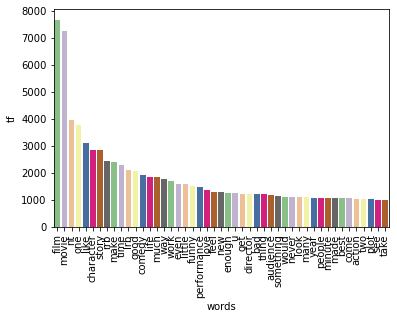

In [98]:
g=sns.barplot(x="words",y="tf",data=a,palette='Accent')
g.set_xticklabels(a["words"],rotation=90);

### Wordcloud
- Wordcloud'lar içerisinde barındırdığı kelimeleri bir kelime bulutu olarak görselleştirip göze hoş gelen bir sunum yapmaktadır.
- İçerisinde bulunan kelimeleri, kelime sıklıklarına göre ölçeklendirip aslında bir nevi verilen metinde bize en çok geçen kelimeler hakkında bilgi sunmaktadır.

In [5]:
!pip install wordcloud

In [6]:
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [7]:
text=data["Phrase"][0]

NameError: name 'data' is not defined

In [ ]:
wordcloud=WordCloud(width=900, height=500,scale=2,margin=2,background_color="white").generate(text)
# Resim bulutu özellikleri 
# generate() resme yazılacak değerin yazıldığı fonksiyondur.

In [ ]:
fig=plt.figure(dpi=1000)
plt.imshow(wordcloud,interpolation="kaiser") 
# interpolation ile resmin nerede kullanılacağına göre, formatına göre tanımlama yapmalıyız. resmi ölçeklendirme denilebilir.
# detaylı bilgi için " https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/interpolation_methods.html "
plt.axis("off") # x ve y eksenlerini iptal ediyoruz. bu sayede grafik değil resim görünümü elde ediyoruz.
plt.show()

In [8]:
wordcloud.to_file("kelimeler.png")
# Resmi kaydettik.

NameError: name 'wordcloud' is not defined

In [9]:
fig.savefig("aaa.svg")
# Bu şekilde de kaydedilebilir. Bulanıklaşma olmaz çünkü svg uzantısı pixellerden oluşmaz.

NameError: name 'fig' is not defined

Yukarıdaki örnek sadece bir satırdaki yorum içindi. 
Şimdi bunu tüm metindeki yorumlar için yapalım.

In [10]:
text=" ".join(i for i in data["Phrase"])

NameError: name 'data' is not defined

In [11]:
text

NameError: name 'text' is not defined

In [12]:
# tüm yorumalar için kelime bulutumuz.
wordcloud=WordCloud(width=900, height=500,scale=2,margin=2,background_color="white",max_font_size=200).generate(text)
fig=plt.figure(dpi=1000)
plt.imshow(wordcloud,interpolation="kaiser") 
plt.axis("off")
plt.show()

NameError: name 'text' is not defined

### Şablonlara göre Wordcloud

In [13]:
imdb_mask=np.array(Image.open("ee.jpg"))

In [14]:
imdb_mask

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)

In [15]:
wc=WordCloud(background_color="white",max_words=1000,mask=imdb_mask,contour_width=3,contour_color="white")
wc.generate(text)
wc.to_file("imdbb.png")
plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="kaiser") 
plt.axis("off")
plt.show()

NameError: name 'text' is not defined